###TAI9111S ASSIGNMENT 1
##PROBLEM 1
##PART 1: Build a Regression Model to Predict Economic Loss due to Fruits & Vegetables Wastage

##Group Members:
#Sakaria Nekwaya 214059286
#Hambeleleni Shaningwa 213091704

In [183]:
##Import the necessary packages
using CSV #import CSV File
using DataFrames #covert CSV file into a Dataframe
using Statistics #exploratory data analysis
using Plots #scatter plot
using StatsBase #describe the data
using GLM #Linear regression model

In [185]:
df = CSV.read("global_food_wastage_dataset.csv", DataFrame)

Row,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,19268.6,18686.7,72.69,87.59,53.64
2,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
3,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
4,France,2023,Fruits & Vegetables,46299.7,40551.2,120.19,953.05,31.91
5,France,2023,Beverages,33096.6,36980.8,104.74,1105.47,36.06
6,India,2024,Fruits & Vegetables,11962.9,11196.0,136.21,1311.91,37.09
7,Germany,2024,Prepared Food,45038.7,39191.2,179.27,1349.45,68.93
8,China,2019,Fruits & Vegetables,12791.2,12233.3,90.8,1229.29,59.9
9,UK,2019,Meat & Seafood,14795.6,14347.0,128.91,450.33,59.01


In [186]:
describe(df)


Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Country,,Argentina,,USA,0,String15
2,Year,2021.02,2018,2021.0,2024,0,Int64
3,Food Category,,Bakery Items,,Prepared Food,0,String31
4,Total Waste (Tons),25061.8,502.61,24865.2,49990.8,0,Float64
5,Economic Loss (Million $),25039.7,406.69,24428.2,59228.9,0,Float64
6,Avg Waste per Capita (Kg),109.464,20.09,110.08,199.97,0,Float64
7,Population (Million),706.606,11.29,713.53,1399.97,0,Float64
8,Household Waste (%),50.0609,30.02,50.295,70.0,0,Float64


In [187]:
#Filter rows for Fruits & Vegetables
fruits_df = filter(row -> row."Food Category" == "Fruits & Vegetables", df)
#Display the results
fruits_df

Row,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,19268.6,18686.7,72.69,87.59,53.64
2,France,2023,Fruits & Vegetables,46299.7,40551.2,120.19,953.05,31.91
3,India,2024,Fruits & Vegetables,11962.9,11196.0,136.21,1311.91,37.09
4,China,2019,Fruits & Vegetables,12791.2,12233.3,90.8,1229.29,59.9
5,Saudi Arabia,2019,Fruits & Vegetables,10653.4,8992.33,74.16,37.76,46.44
6,Australia,2020,Fruits & Vegetables,1322.82,1394.01,88.85,205.78,30.63
7,Italy,2023,Fruits & Vegetables,30875.3,31341.6,198.26,349.04,52.64
8,Spain,2021,Fruits & Vegetables,41676.2,43058.3,135.22,1325.54,54.32
9,Italy,2024,Fruits & Vegetables,20238.7,18395.9,22.64,467.6,50.9


In [188]:
n = nrow(fruits_df)

620

In [189]:
[col => count(ismissing, fruits_df[!, col]) for col in names(fruits_df)]

8-element Vector{Pair{String, Int64}}:
                    "Country" => 0
                       "Year" => 0
              "Food Category" => 0
         "Total Waste (Tons)" => 0
 "Economic Loss (Million \$)" => 0
  "Avg Waste per Capita (Kg)" => 0
       "Population (Million)" => 0
        "Household Waste (%)" => 0

In [190]:
#Change column names to valid symbols
rename!(fruits_df, :"Total Waste (Tons)" => :TotalWaste, :"Economic Loss (Million \$)" => :EconomicLoss, :"Avg Waste per Capita (Kg)" => :AvgWastePerCapita, :"Population (Million)" => :Population, :"Household Waste (%)" => :HouseholdWaste)

Row,Country,Year,Food Category,TotalWaste,EconomicLoss,AvgWastePerCapita,Population,HouseholdWaste
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,19268.6,18686.7,72.69,87.59,53.64
2,France,2023,Fruits & Vegetables,46299.7,40551.2,120.19,953.05,31.91
3,India,2024,Fruits & Vegetables,11962.9,11196.0,136.21,1311.91,37.09
4,China,2019,Fruits & Vegetables,12791.2,12233.3,90.8,1229.29,59.9
5,Saudi Arabia,2019,Fruits & Vegetables,10653.4,8992.33,74.16,37.76,46.44
6,Australia,2020,Fruits & Vegetables,1322.82,1394.01,88.85,205.78,30.63
7,Italy,2023,Fruits & Vegetables,30875.3,31341.6,198.26,349.04,52.64
8,Spain,2021,Fruits & Vegetables,41676.2,43058.3,135.22,1325.54,54.32
9,Italy,2024,Fruits & Vegetables,20238.7,18395.9,22.64,467.6,50.9


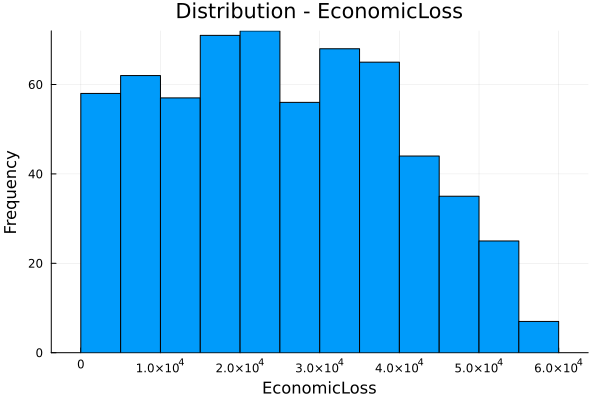

In [197]:
#1. Distribution of Economic Loss due to Fruits & Vegetable Wastage
histogram(fruits_df.EconomicLoss, title="Distribution - EconomicLoss", xlabel="EconomicLoss", ylabel="Frequency", legend=false)

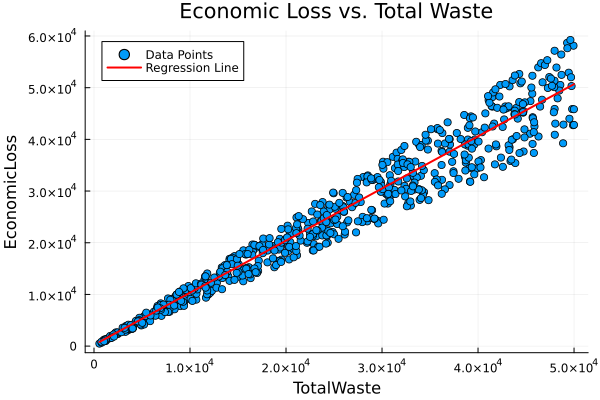

In [199]:
using Plots

# Scatter plot of actual data
scatter(fruits_df.TotalWaste, fruits_df.EconomicLoss,
        label="Data Points", xlabel="TotalWaste", ylabel="EconomicLoss", title="Economic Loss vs. Total Waste")
# Regression line
x_vals = collect(minimum(fruits_df."TotalWaste"):maximum(fruits_df."TotalWaste"))
y_vals = coef(model)[1] .+ coef(model)[2] .* x_vals
plot!(x_vals, y_vals, label="Regression Line", linewidth=2, color=:red)


In [201]:
#Correlation Matrix
cor_mat = cor(Matrix(fruits_df[:, [4,5,6,7,8]]))
println(cor_mat)

[1.0 0.974255442537655 0.06407958648208577 0.009909305160824859 -0.008596334974238527; 0.974255442537655 1.0 0.07101446727095548 -7.631168723186837e-5 -0.013690197535199636; 0.06407958648208577 0.07101446727095548 1.0 -0.0034816606751244595 -0.01681778997799965; 0.009909305160824859 -7.631168723186837e-5 -0.0034816606751244595 1.0 0.016064646800768027; -0.008596334974238527 -0.013690197535199636 -0.01681778997799965 0.016064646800768027 1.0]


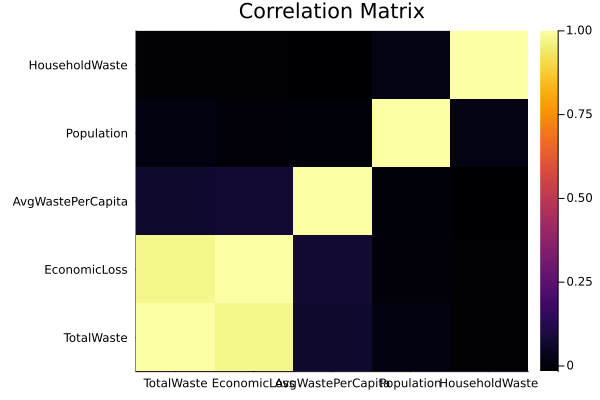

In [203]:
#Correlation Heat Map
cor_matrix = cor(Matrix(fruits_df[:, [:TotalWaste, :EconomicLoss, :AvgWastePerCapita, :Population, :HouseholdWaste]]))
heatmap(names(fruits_df[:, [:TotalWaste, :EconomicLoss, :AvgWastePerCapita, :Population, :HouseholdWaste]]), names(fruits_df[:, [:TotalWaste, :EconomicLoss, :AvgWastePerCapita, :Population, :HouseholdWaste]]), cor_matrix, title="Correlation Matrix")

In [237]:
#There is high correlation between Economic Loss and Total Waste

In [205]:
#Build Linear Regression Model since there is a strong linear Distribution between Economic Loss and Total Waste
model = lm(@formula(EconomicLoss ~ TotalWaste + AvgWastePerCapita + Population + HouseholdWaste), fruits_df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

EconomicLoss ~ 1 + TotalWaste + AvgWastePerCapita + Population + HouseholdWaste

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)        232.359     725.291         0.32    0.7488  -1191.99      1656.71
TotalWaste           1.00902     0.00942222  107.09    <1e-99      0.990512     1.02752
AvgWastePerCapita    2.3803      2.54706       0.93    0.3504     -2.62168      7.38228
Population          -0.340323    0.321208     -1.06    0.2898     -0.971122     0.290475
HouseholdWaste      -6.34033    11.4589       -0.55    0.5803    -28.8437      16.163
─────────

In [209]:
using StatsBase
#Predict Economic Loss due to Fruits & Vegetables Wastage
fruits_df[!, :PredictedEconomicLoss] = predict(model)
println("First 10 predictions")
first(fruits_df, 10)

First 10 predictions


Row,Country,Year,Food Category,TotalWaste,EconomicLoss,AvgWastePerCapita,Population,HouseholdWaste,PredictedEconomicLoss
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,19268.6,18686.7,72.69,87.59,53.64,19477.8
2,France,2023,Fruits & Vegetables,46299.7,40551.2,120.19,953.05,31.91,46708.9
3,India,2024,Fruits & Vegetables,11962.9,11196.0,136.21,1311.91,37.09,11945.7
4,China,2019,Fruits & Vegetables,12791.2,12233.3,90.8,1229.29,59.9,12556.9
5,Saudi Arabia,2019,Fruits & Vegetables,10653.4,8992.33,74.16,37.76,46.44,10851.0
6,Australia,2020,Fruits & Vegetables,1322.82,1394.01,88.85,205.78,30.63,1514.36
7,Italy,2023,Fruits & Vegetables,30875.3,31341.6,198.26,349.04,52.64,31405.4
8,Spain,2021,Fruits & Vegetables,41676.2,43058.3,135.22,1325.54,54.32,41810.6
9,Italy,2024,Fruits & Vegetables,20238.7,18395.9,22.64,467.6,50.9,20225.5


In [211]:
# Define target variable (Economic Loss)
y = fruits_df[:, :EconomicLoss]

# Select feature columns
X = select(fruits_df, Not(:EconomicLoss))


Row,Country,Year,Food Category,TotalWaste,AvgWastePerCapita,Population,HouseholdWaste,PredictedEconomicLoss
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,19268.6,72.69,87.59,53.64,19477.8
2,France,2023,Fruits & Vegetables,46299.7,120.19,953.05,31.91,46708.9
3,India,2024,Fruits & Vegetables,11962.9,136.21,1311.91,37.09,11945.7
4,China,2019,Fruits & Vegetables,12791.2,90.8,1229.29,59.9,12556.9
5,Saudi Arabia,2019,Fruits & Vegetables,10653.4,74.16,37.76,46.44,10851.0
6,Australia,2020,Fruits & Vegetables,1322.82,88.85,205.78,30.63,1514.36
7,Italy,2023,Fruits & Vegetables,30875.3,198.26,349.04,52.64,31405.4
8,Spain,2021,Fruits & Vegetables,41676.2,135.22,1325.54,54.32,41810.6
9,Italy,2024,Fruits & Vegetables,20238.7,22.64,467.6,50.9,20225.5


In [213]:
using MLJ

In [215]:
# Standardize numerical features
stand_model = Standardizer()
stand_machine = machine(stand_model, X) |> fit!
X = MLJ.transform(stand_machine, X)


[ Info: Training machine(Standardizer(features = Symbol[], …), …).


Row,Country,Year,Food Category,TotalWaste,AvgWastePerCapita,Population,HouseholdWaste,PredictedEconomicLoss
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,-0.41056,-0.703034,-1.4921,0.299332,-0.40326
2,France,2023,Fruits & Vegetables,1.51382,0.211039,0.61243,-1.58552,1.51687
3,India,2024,Fruits & Vegetables,-0.930665,0.519322,1.48507,-1.13621,-0.93437
4,China,2019,Fruits & Vegetables,-0.871697,-0.354532,1.28416,0.842321,-0.891274
5,Saudi Arabia,2019,Fruits & Vegetables,-1.02389,-0.674745,-1.61327,-0.325192,-1.01156
6,Australia,2020,Fruits & Vegetables,-1.68815,-0.392057,-1.2047,-1.69654,-1.66991
7,Italy,2023,Fruits & Vegetables,0.415735,1.71339,-0.856336,0.212593,0.437781
8,Spain,2021,Fruits & Vegetables,1.18466,0.50027,1.51821,0.358315,1.17148
9,Italy,2024,Fruits & Vegetables,-0.341503,-1.66618,-0.568035,0.0616662,-0.35054


In [217]:
using Random

In [219]:
#Split data
train_idx = randperm(n)[1:Int(0.8n)]
train_data = fruits_df[train_idx, :]
test_data = fruits_df[setdiff(1:n, train_idx), :]

Row,Country,Year,Food Category,TotalWaste,EconomicLoss,AvgWastePerCapita,Population,HouseholdWaste,PredictedEconomicLoss
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64,Float64
1,Saudi Arabia,2019,Fruits & Vegetables,10653.4,8992.33,74.16,37.76,46.44,10851.0
2,Australia,2020,Fruits & Vegetables,1322.82,1394.01,88.85,205.78,30.63,1514.36
3,Argentina,2024,Fruits & Vegetables,34377.5,29795.0,119.44,790.96,30.6,34740.9
4,Spain,2022,Fruits & Vegetables,49894.0,42739.2,123.54,446.97,62.03,50324.8
5,China,2024,Fruits & Vegetables,31630.7,36217.5,181.08,270.32,56.04,32131.9
6,India,2021,Fruits & Vegetables,20385.3,21467.1,134.21,856.05,44.38,20548.2
7,South Africa,2018,Fruits & Vegetables,48569.1,50526.4,111.18,775.09,30.09,49049.4
8,China,2020,Fruits & Vegetables,28052.2,32720.6,142.25,416.66,42.46,28465.1
9,Saudi Arabia,2020,Fruits & Vegetables,26368.7,23936.5,155.26,28.75,40.87,26939.4


In [221]:
#predictions
train_pred = predict(model, train_data)
test_pred = predict(model, test_data)

124-element Vector{Union{Missing, Float64}}:
 10851.005785461348
  1514.358466054836
 34740.909892658136
 50324.81530116115
 32131.903808184816
 20548.203014885374
 49049.39306583234
 28465.092971438135
 26939.42779418042
  7036.090913678114
 30599.52288678121
  4723.183746798477
 40584.6863076074
     ⋮
  6798.071339706031
 43407.441814210695
 31290.990604106013
 14797.76242993677
 15060.465315266996
  1352.8870816312876
 14507.804798644376
 43169.68172214128
 13613.013665768549
 38955.46246572443
   527.9631037798954
 18690.630620192318

In [223]:
rmse = sqrt(mean((fruits_df.EconomicLoss .- fruits_df.PredictedEconomicLoss) .^2))
mae = mean(abs.(fruits_df.EconomicLoss .- fruits_df.PredictedEconomicLoss))
println("RMSE: ", round(rmse; digits=2))
println("MAE: ", round(mae; digits=2))

RMSE: 3272.53
MAE: 2461.75


In [225]:
#Model R-squared
r2_value = r2(model)
println("R-squared: ", round(r2_value, digits=3))

R-squared: 0.949


In [231]:
X_test = select(test_data, Not(:EconomicLoss))
y_test = test_data[:, :EconomicLoss]

124-element Vector{Float64}:
  8992.33
  1394.01
 29795.03
 42739.19
 36217.51
 21467.14
 50526.39
 32720.64
 23936.55
  6098.7
 34331.56
  4613.14
 41377.71
     ⋮
  7472.43
 50711.06
 31992.48
 16805.56
 17812.77
  1259.67
 15849.56
 37950.98
 15670.87
 37070.92
   828.01
 18488.3

In [235]:
# Scatter plot for actual vs predicted values
scatter(y_test, y_pred, xlabel="Actual EconomicLoss", ylabel="Predicted EconomicLoss", label="Ridge Regression", color=:blue)
scatter!(y_test, y_pred, label="Random Forest Regression", color=:red)
plot!(identity, linestyle=:dash, label="Ideal Fit (y=x)", color=:black)
title!("Actual vs Predicted EconomicLoss")

LoadError: UndefVarError: `y_pred` not defined in `Main`
Suggestion: check for spelling errors or missing imports.